In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = './data/'

In [3]:
images_medseg = np.load(data_dir + 'images_medseg.npy')
masks_medseg = np.load(data_dir + 'masks_medseg.npy')
images_radiopedia = np.load(data_dir + 'images_radiopedia.npy')
maker_radiopedia = np.load(data_dir + 'masks_radiopedia.npy')
test_images_medseg = np.load(data_dir + 'test_images_medseg.npy')

In [4]:
print(images_medseg.shape)
print(masks_medseg.shape)
print(images_radiopedia.shape)
print(maker_radiopedia.shape)
print(test_images_medseg.shape)

(100, 512, 512, 1)
(100, 512, 512, 4)
(829, 512, 512, 1)
(829, 512, 512, 4)
(10, 512, 512, 1)


In [10]:
def show_pics(image, mask, nums):
    mask_num = mask.shape[-1] if mask is not None else 0
    fig, ax = plt.subplots(5, nums)
    for i in range(nums):
        ax_img = ax[0, i]
        ax_img.imshow(image[i], cmap='gray')
        ax_img.set_xticks([])
        ax_img.set_yticks([])
        
        if mask is not None:
            for j in range(mask_num):
                ax_mask = mask[i, :, :, j]
                ax[j+1, i].imshow(ax_mask)
                ax[j+1, i].set_xticks([])
                ax[j+1, i].set_yticks([])
    
    plt.tight_layout()  
    plt.show()

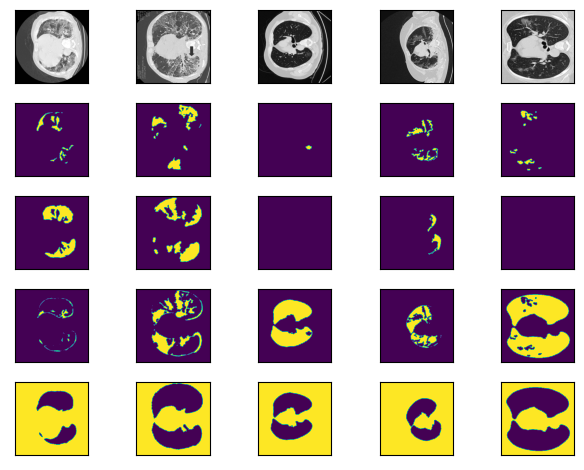

In [11]:
show_pics(images_medseg, masks_medseg, 5)

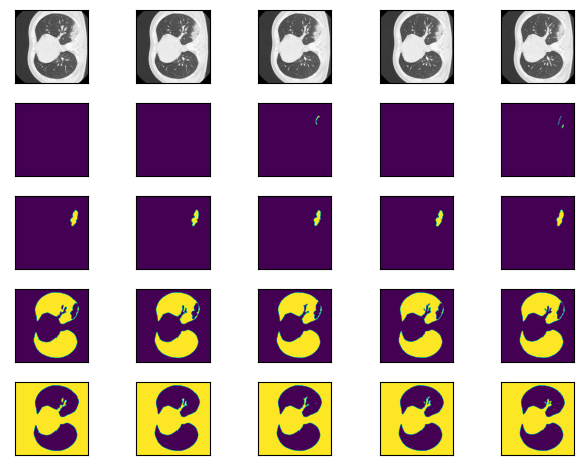

In [16]:
show_pics(images_radiopedia[374:], maker_radiopedia[374:], 5)

Images are full CT volumes:
Class 0 is "ground glass"——毛玻璃
Class 1 is "consolidations"——实变
Class 2 is "lungs other"——肺部其他
Class 3 is "background"——背景

In [17]:
print(images_medseg[0])

[[[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]

 [[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]

 [[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]

 ...

 [[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]

 [[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]

 [[-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]
  ...
  [-1408.5106383]
  [-1408.5106383]
  [-1408.5106383]]]


In [18]:
train_images = np.concatenate((images_medseg, images_radiopedia), axis=0)
print(train_images.shape)

(929, 512, 512, 1)
